# 🚓 Chicago Crime Rate Prediction Model 📊

This `notebook` implements an **end-to-end time series forecasting model** to predict future crime rates in Chicago using `Facebook Prophet`.

It includes **Data Exploration**, **Cleaning**, **Modeling** and **Evaluation.**

**Note:** Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

## 🗂️ Dataset Overview:

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from `2001` to `2017`.

- Dataset contains the following columns:

    **1. ID:** Unique identifier for the record.

    **2. Case Number:** The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

    **3. Date:** Date when the incident occurred.

    **4. Block:** address where the incident occurred

    **5. IUCR:** The Illinois Unifrom Crime Reporting code.

    **6. Primary Type:** The primary description of the IUCR code.

    **7. Description:** The secondary description of the IUCR code, a subcategory of the primary description.

    **8. Location Description:** Description of the location where the incident occurred.

    **9. Arrest:** Indicates whether an arrest was made.

    **10. Domestic:** Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

    **11. Beat:** Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car.

    **12. District:** Indicates the police district where the incident occurred.

    **13. Ward:** The ward (City Council district) where the incident occurred.

    **14. Community Area:** Indicates the community area where the incident occurred. Chicago has 77 community areas.

    **15. FBI Code:** Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).

    **16. X Coordinate:** The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.

    **17. Y Coordinate:** The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection.

    **18. Year:** Year the incident occurred.

    **19. Updated On:** Date and time the record was last updated.

    **20. Latitude:** The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

    **21. Longitude:** The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

    **22. Location:** The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

## 💻 Installing Packages:
You must install fbprophet package as follows:

In [1]:
!pip install prophet

## 📂 Importing the Dataset (do in case implementing in colab):
There are 4 CSV files containing each data from: 2001 to 2004, 2005 to 2007, 2008 to 2011 and 2012 to 2017 respectively:

In [2]:
# from google.colab import drive
#drive.mount('/content/drive')

#%cd /content/drive/MyDrive/Chicago Crime Rate Prediction Model

## ⚙️ Importing Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

In [4]:
# dataframes creation for both training and testing datasets
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='warn')
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='warn')
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', on_bad_lines='warn')
#on_bad_lines is done when a dataset has a lot of corrupt or missing data


C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\2281147903.py:2: ParserWarning: Skipping line 533719: expected 23 fields, saw 24

  chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', on_bad_lines='warn')
C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\2281147903.py:3: ParserWarning: Skipping line 1149094: expected 23 fields, saw 41

  chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', on_bad_lines='warn')


In [5]:
chicago_df_1.shape

(1872343, 23)

In [6]:
chicago_df_2.shape

(2688710, 23)

In [7]:
chicago_df_3.shape

(1456714, 23)

In [8]:
# Concatinate the three data frames into one:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3])

In [9]:
chicago_df.shape

(6017767, 23)

## 🗃️🔍 Exploratory Data Analysis:

In [10]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


<Axes: >

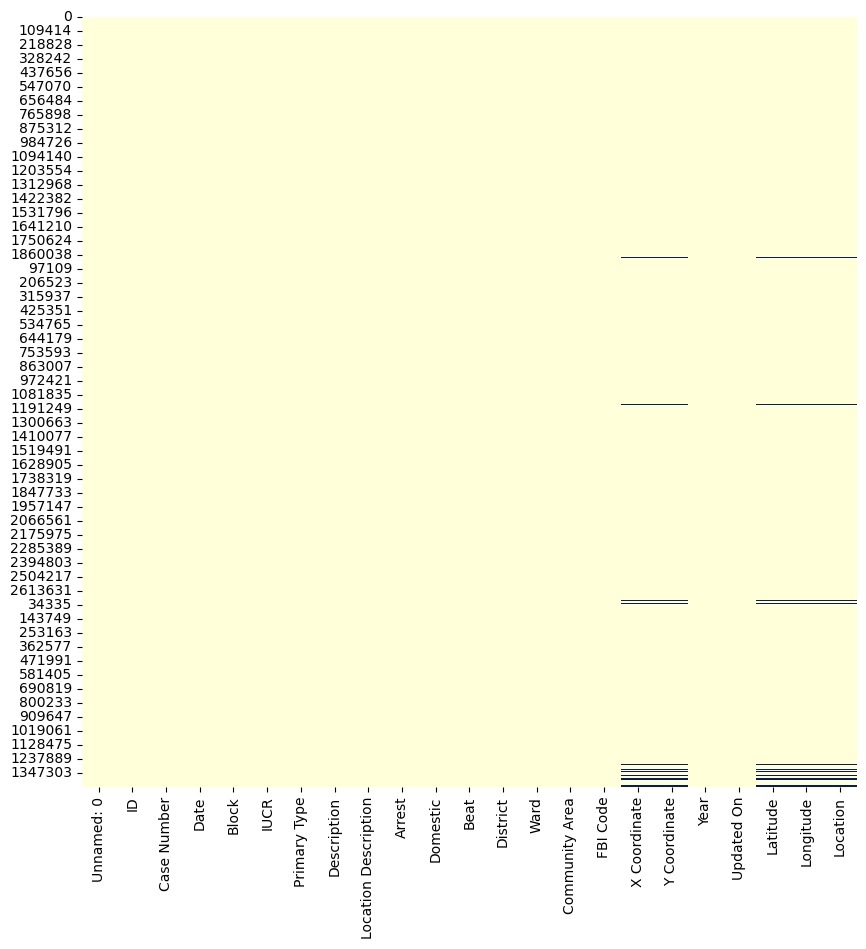

In [11]:
# To see if any field in the dataset is empty or not:
plt.figure(figsize = (10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = "YlGnBu")

In [12]:
# Dropping the field/rows that we dont need for predictions:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'Location', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)

In [13]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [14]:
# Rearranging date and time format in the Date row:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format = '%m/%d/%Y %I:%M:%S %p')   # %I is for 12 hour format, %M is minutes, %S is seconds and %p is for AM/PM
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [15]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [16]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [17]:
# To check all different types of crimes in the dataset:
chicago_df['Primary Type'].value_counts()

Primary Type
THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                58

In [18]:
# Top 15 samples:
chicago_df['Primary Type'].value_counts().iloc[0:15]

Primary Type
THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: count, dtype: int64

In [19]:
# Only to get the titles:
order_data = chicago_df['Primary Type'].value_counts().iloc[0:15].index.unique()

In [20]:
# To reset the index, and remove duplicate labels:
chicago_df = chicago_df.reset_index(drop=True)

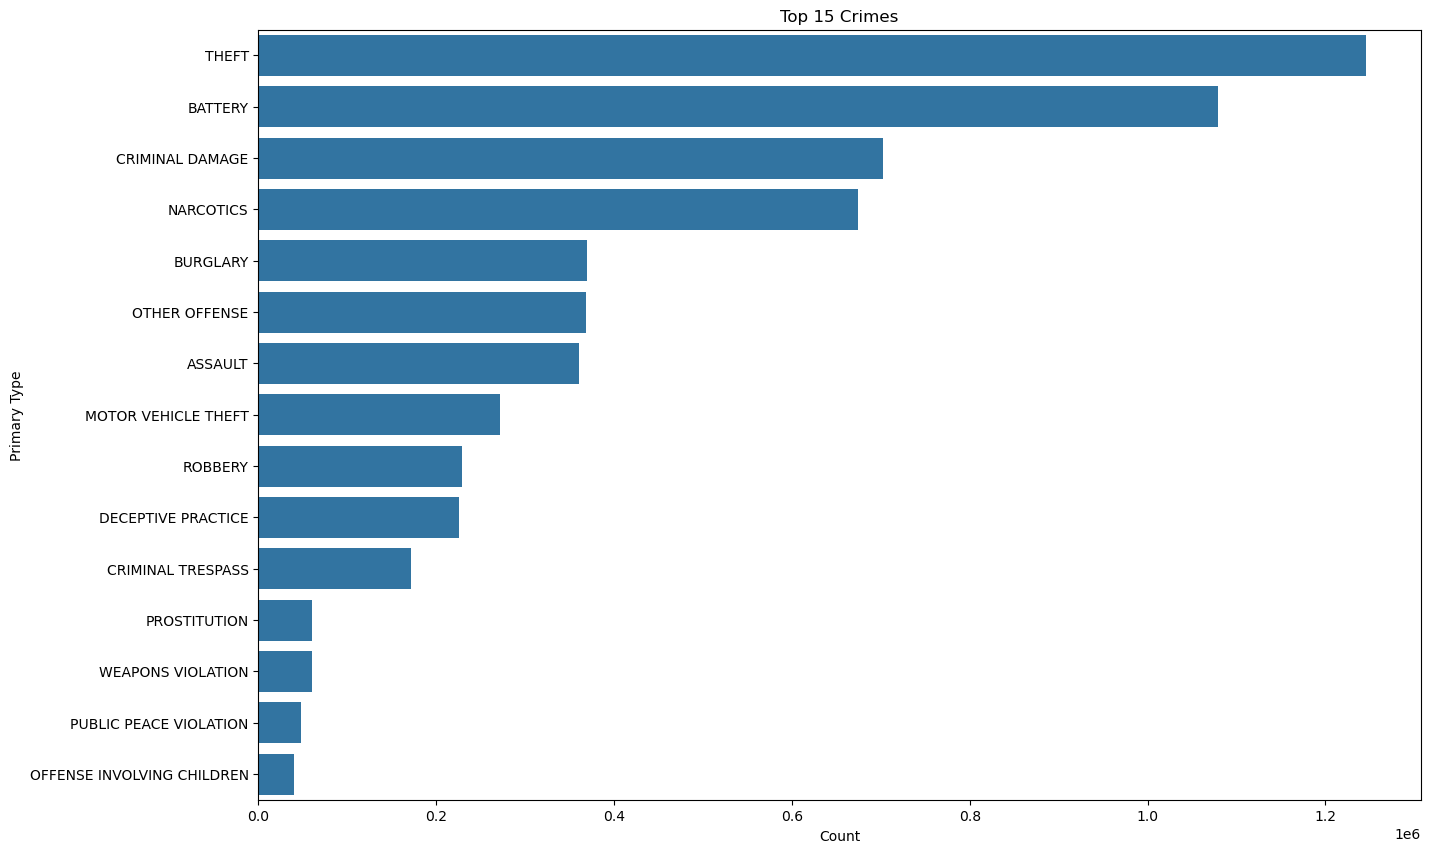

In [21]:
# To visualize which crime is most common:
plt.figure(figsize = (15, 10))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data)
plt.title('Top 15 Crimes')
plt.xlabel('Count')
plt.ylabel('Primary Type')
plt.show()

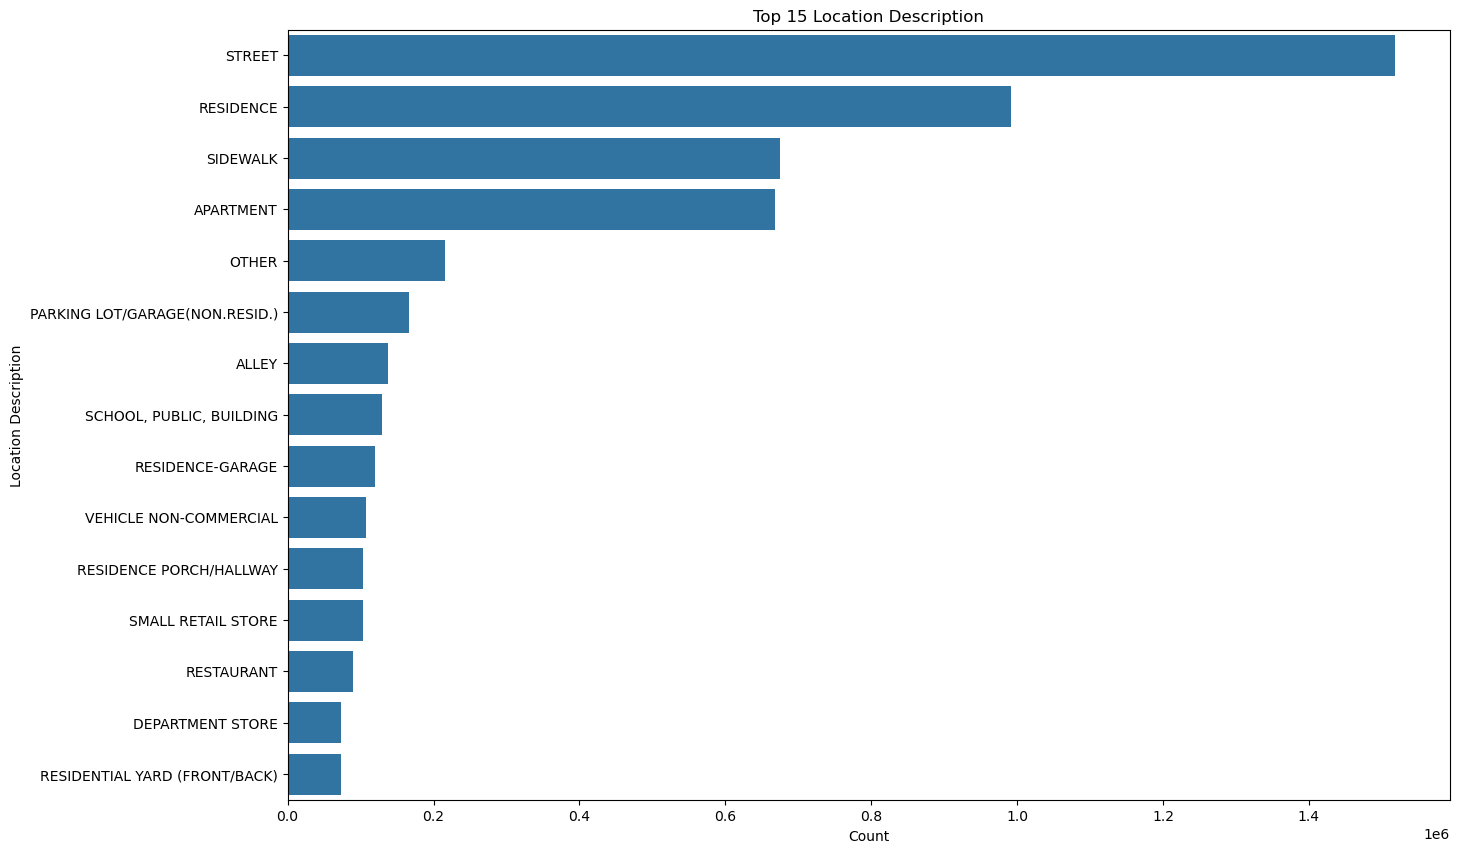

In [22]:
# To visualize which location is most common:
plt.figure(figsize = (15,10))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)
plt.title('Top 15 Location Description')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()

In [23]:
# 1. Convert 'Date' column to datetime
chicago_df['Date'] = pd.to_datetime(chicago_df['Date'], errors='coerce')

# 2. Set 'Date' as the index
chicago_df = chicago_df.set_index('Date')

# To check how many crimes occured in a specific time(year or month):
chicago_df.resample('Y').size()

C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\1454759227.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chicago_df.resample('Y').size()


Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: YE-DEC, dtype: int64

C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\130474720.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


Text(0, 0.5, 'Number of Crimes')

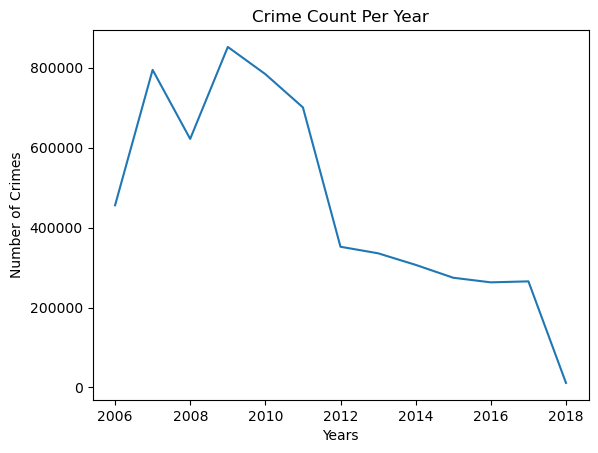

In [24]:
# Visualize crimes per year:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\1925759319.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


Text(0, 0.5, 'Number of Crimes')

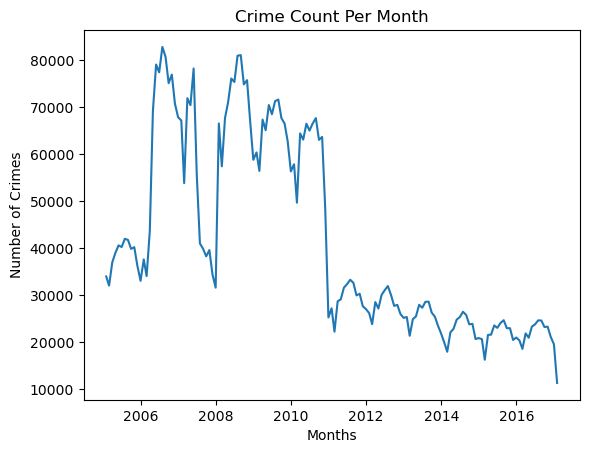

In [25]:
# Visualize crimes per month:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\3381158242.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


Text(0, 0.5, 'Number of Crimes')

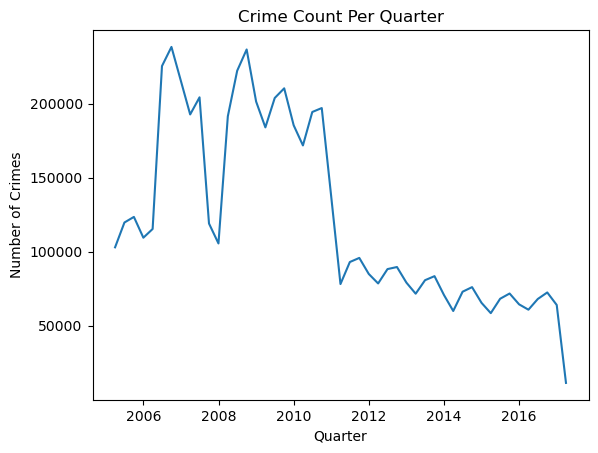

In [26]:
# Visualize crimes per quarter:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Crimes')

## 🛠️ Preparing the Data:


In [27]:
# Monthly data till 2017 with size/frequency of crimes that month
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

C:\Users\sandh\AppData\Local\Temp\ipykernel_21348\2820118451.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_df.resample('M').size().reset_index()


,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [28]:
# Renaming the column headers:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [29]:
# Since we need ds and y as our 2 columns needed:
chicago_prophet_df_final = chicago_prophet.rename(columns = {'Date': 'ds', 'Crime Count': 'y'})
chicago_prophet_df_final 

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


## 📈 Predictions using FbProphet (Facebook Prophet):
We shall use the Prophet library for making predictions:

In [30]:
# Fit the data in the data frame chicago_prophet_df final into Prophet() to apply prophet series:
m = Prophet()
m.fit(chicago_prophet_df_final)

16:39:45 - cmdstanpy - INFO - Chain [1] start processing
16:39:46 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Making predictions:
future = m.make_future_dataframe(periods = 365)   # periods is taken 365 to see predictions for the next 365 days
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.833000,38106.710070,73191.116814,60454.833000,60454.833000,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,-4762.390205,0.0,0.0,0.0,55692.442795
1,2005-02-28,60322.430432,34897.523555,66857.500245,60322.430432,60322.430432,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,-9500.517380,0.0,0.0,0.0,50821.913052
2,2005-03-31,60175.841875,42045.655807,75382.591678,60175.841875,60175.841875,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,-1224.147706,0.0,0.0,0.0,58951.694169
3,2005-04-30,60033.981981,44376.829866,77258.123666,60033.981981,60033.981981,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,1182.826674,0.0,0.0,0.0,61216.808655
4,2005-05-31,59887.393424,49131.771355,82195.315257,59887.393424,59887.393424,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,5498.247091,0.0,0.0,0.0,65385.640515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,10104.391329,-12427.002112,21910.118808,9974.207108,10273.034028,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,-4977.922716,0.0,0.0,0.0,5126.468613
506,2018-01-28,10091.324708,-11096.708625,21855.565130,9960.925182,10260.498006,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,-4922.570296,0.0,0.0,0.0,5168.754412
507,2018-01-29,10078.258087,-11705.974190,22112.796818,9946.805388,10247.954865,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,-4867.889655,0.0,0.0,0.0,5210.368432
508,2018-01-30,10065.191466,-11662.152947,22828.890927,9932.819318,10235.380084,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,-4816.712501,0.0,0.0,0.0,5248.478965


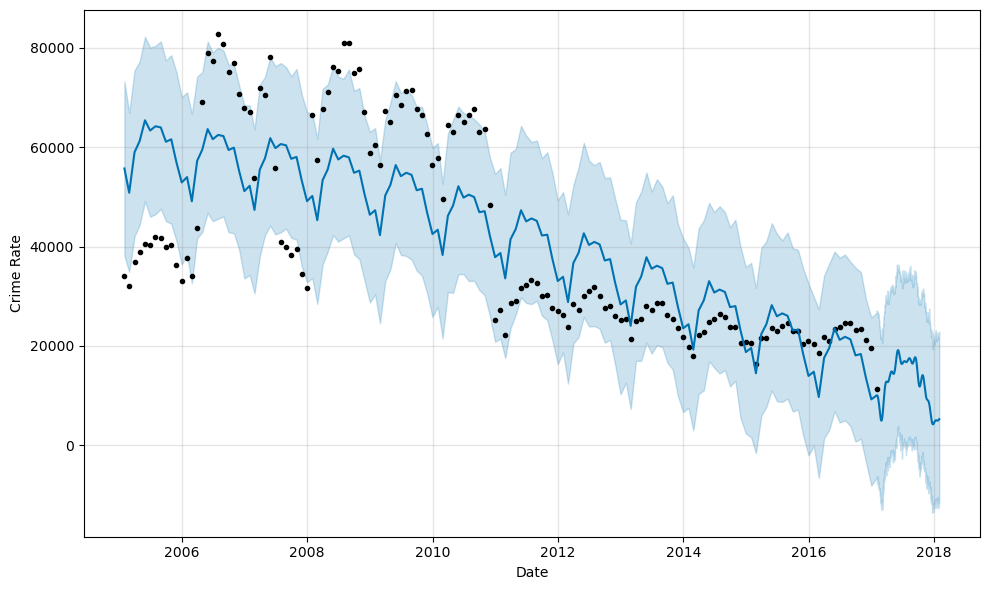

In [32]:
# Visualize the crime rate predictions (predicting for year 2018):
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Rate')

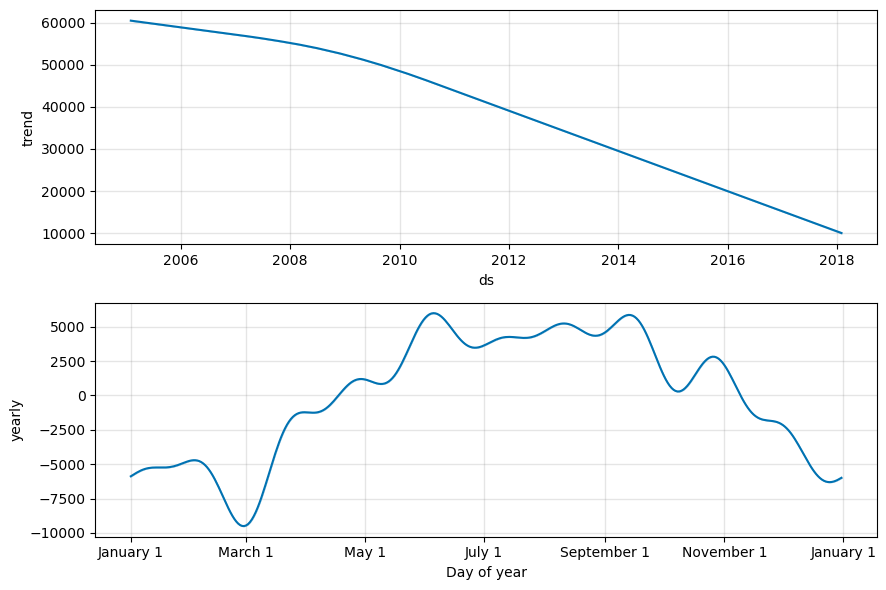

In [33]:
# 1st graph is visualization of trends throughout years and prediction of year 2018
# 2nd graph is visualization of seasonality throughout a single year
figure = m.plot_components(forecast)